In [37]:
import numpy as np
import math
import sdeint
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
import pickle
from scipy.optimize import curve_fit
from scipy.special import factorial
gamma = 0.577215664901532860606512090082402431

In [38]:
##Define the Well Function

def Well(eta,order=10):
    W=-gamma-np.log(eta)
    if order==0:
        return W
    else:
        i = np.arange(1, order+1)
        # Calcolo vettoriale della serie
        terms = (-eta[:, None]) ** i / (i * factorial(i))
        summ = -np.sum(terms, axis=1)
        
        return W+summ
    
    

In [39]:
#Define the scaled well for the FIT

def scaled_Well(eta, A, B):
    return B * Well(A * eta)

In [40]:
#Define the Transmissivity obtained via Theis' Method

def Transmissivity(B,Q):
    return (Q*B)/(4*(math.pi))

In [41]:
#Define the Transmissivity obtained via Theis' Method

def Storage_coefficient(A,T,r):
    
    return 4*T/(A*(r**2))

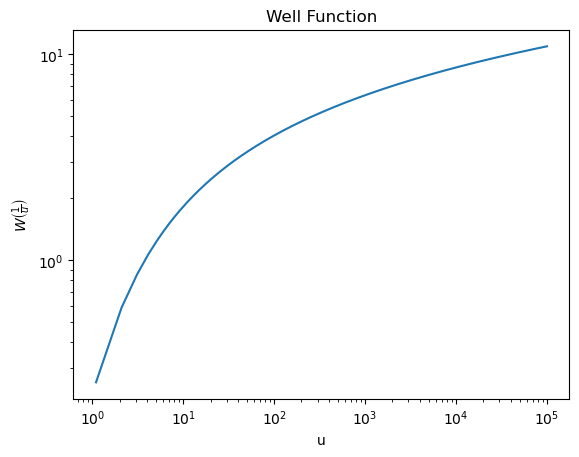

In [42]:
#Plot The Well Function

sim = np.linspace(1.1,100000, 100000)
W=Well(1/sim)
plt.plot(sim,abs(W))

plt.title('Well Function')
plt.xlabel('u')
plt.ylabel(r'$W\left(\frac{1}{u}\right)$')
plt.xscale('log')
plt.yscale('log')
plt.savefig("/home/simone/Scrivania/Physics of the Hydrosphere/Figure/Well.png",bbox_inches="tight")

In [43]:
#Get the data

data = pd.read_excel("/home/simone/Scrivania/Physics of the Hydrosphere/Lecture notes and material for practical classes/Files for exercises/PumpingTests.xlsx", sheet_name="Confined aquifers",skiprows=5,engine="openpyxl")

In [44]:
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [45]:
##from Domenico & Schwartz, 1998
Q1=5.43E3/(24*60*60)
r1=30.5
data1= data.iloc[:, :2]
data1=data1.dropna()

In [46]:
#Convert data into np.array
s=data1[data1.columns[1]]
t=data1[data1.columns[0]]*60
s=np.array(s)
t=np.array(t)

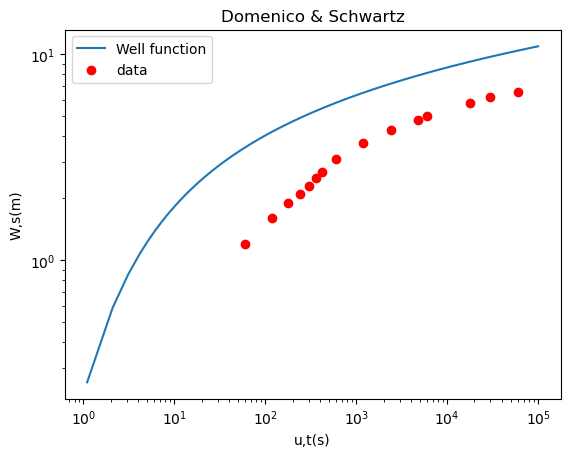

In [47]:
#plot the data in comparison to the well function

plt.plot(sim,W, label='Well function')
plt.scatter(t,s, color='r' ,label='data')
plt.legend()
plt.xlabel('u,t(s)')
plt.ylabel('W,s(m)')
plt.xscale('log')
plt.yscale('log')
plt.title('Domenico & Schwartz') 
plt.savefig("/home/simone/Scrivania/Physics of the Hydrosphere/Figure/Domenico.png",bbox_inches="tight")

In [48]:
#Execute the Fit with the scaled well and get the scaling coeeficient A and B

bounds = ([0, 0], [10.0, 10.0])
popt, pcov = curve_fit(scaled_Well, 1/t, s, bounds=bounds)


A_opt, B_opt = popt

A=1/A_opt
B=1/B_opt

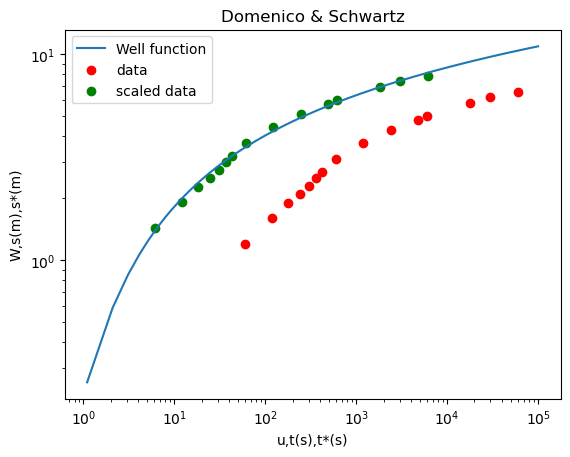

In [49]:
#Plot the scaled data and the normal data

plt.plot(sim,W, label='Well function')
plt.scatter(t,s, color='r' ,label='data')
plt.scatter(t*A,s*B, color='g' ,label='scaled data')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('u,t(s),t*(s)')
plt.ylabel('W,s(m),s*(m)')
plt.title('Domenico & Schwartz') 
plt.savefig("/home/simone/Scrivania/Physics of the Hydrosphere/Figure/Domenico_Scaled.png",bbox_inches="tight")

In [50]:
#Compute the Transimssivity and the Storage Coefficient

T_1=Transmissivity(B,Q1)
S_1=Storage_coefficient(A,T_1,r1)

print(T_1,S_1)

0.005978089965574119 0.00025141440464949635


In [51]:
##Walton
Q_2=220*6.31E-5
r_2=824*0.3048
data2=data.iloc[:,[2,3]]

In [52]:
s2=data2[data2.columns[1]]
t2=data2[data2.columns[0]]*60
s2=np.array(s2)
t2=np.array(t2)

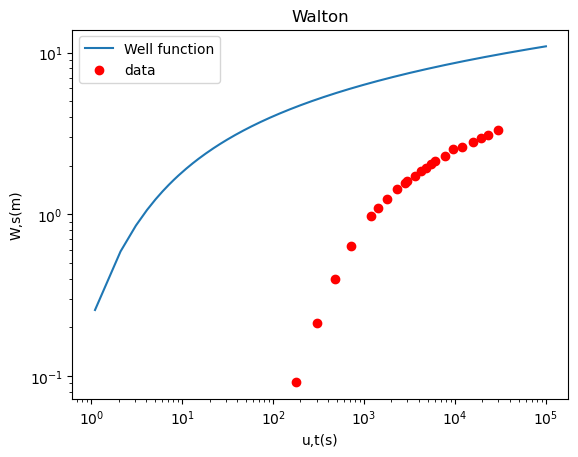

In [53]:
#plot the data in comparison to the well function

plt.plot(sim,W, label='Well function')
plt.scatter(t2,s2, color='r' ,label='data')
plt.xlabel('u,t(s)')
plt.ylabel('W,s(m)')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.title('Walton') 
plt.savefig("/home/simone/Scrivania/Physics of the Hydrosphere/Figure/Walton.png",bbox_inches="tight")

In [54]:

bounds = ([0, 0], [200.0,200.0])
popt2, pcov2 = curve_fit(scaled_Well, 1/t2, s2, bounds=bounds)

A_opt2, B_opt2 = popt2

A2=1/A_opt2
B2=1/B_opt2

<Figure size 640x480 with 0 Axes>

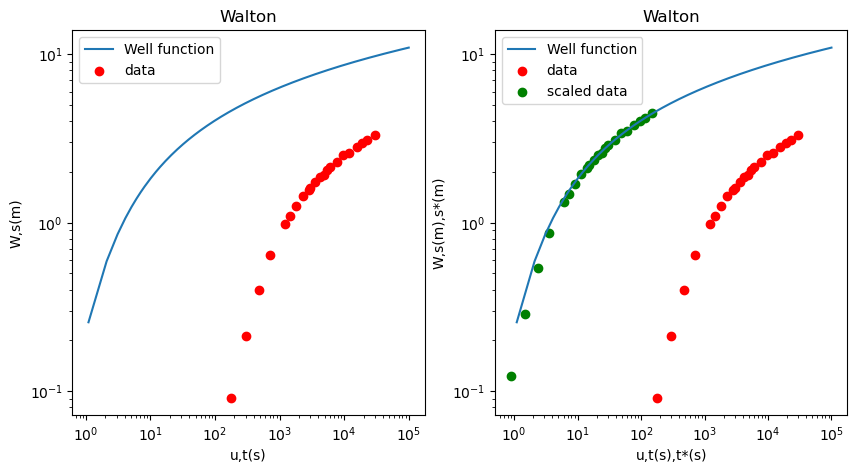

In [67]:
plt.figure()


fig, axs=plt.subplots(1,2, figsize=(10,5))
axs[0].plot(sim,abs(W), label='Well function')
axs[0].scatter(t2,s2, color='r' ,label='data')

axs[0].legend()
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel('u,t(s)')
axs[0].set_ylabel('W,s(m)')
axs[0].set_title('Walton') 

axs[1].plot(sim,abs(W), label='Well function')
axs[1].scatter(t2,s2, color='r' ,label='data')
axs[1].scatter(t2*A2,s2*B2, color='g' ,label='scaled data')
axs[1].legend()
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('u,t(s),t*(s)')
axs[1].set_ylabel('W,s(m),s*(m)')
axs[1].set_title('Walton') 
plt.savefig("/home/simone/Scrivania/Physics of the Hydrosphere/Figure/Walton_scaled.png",bbox_inches="tight")

In [56]:
T_2=Transmissivity(B2,Q_2)
S_2=Storage_coefficient(A2,T_2,r_2)

print(T_2,S_2)

0.001494513613656525 1.895420239178051e-05


In [69]:
##
Q_3=1500/(24*60*60)
r_3=100
data3=data.iloc[:,[4,5]]

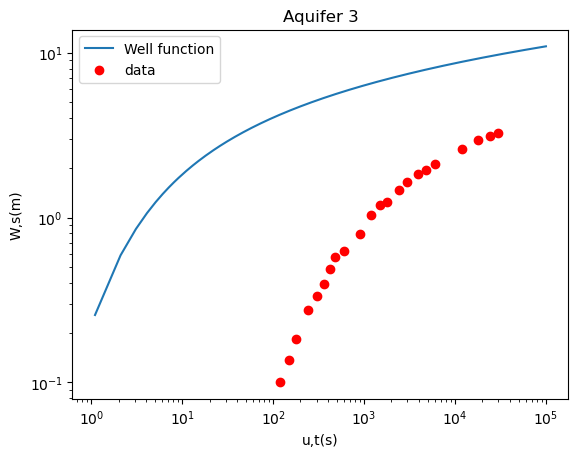

In [70]:


s3=data3[data3.columns[1]]
t3=data3[data3.columns[0]]*60
s3=np.array(s3)
t3=np.array(t3)

#plot the data in comparison to the well function

plt.plot(sim,W, label='Well function')
plt.scatter(t3,s3, color='r' ,label='data')
plt.xlabel('u,t(s)')
plt.ylabel('W,s(m)')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title('Aquifer 3') 
plt.savefig("/home/simone/Scrivania/Physics of the Hydrosphere/Figure/Aquifer3.png",bbox_inches="tight")

In [71]:
bounds = ([0, 0], [200.0,200.0])
popt3, pcov3 = curve_fit(scaled_Well, 1/t3, s3, bounds=bounds)

A_opt3, B_opt3 = popt3

A3=1/A_opt3
B3=1/B_opt3

<Figure size 640x480 with 0 Axes>

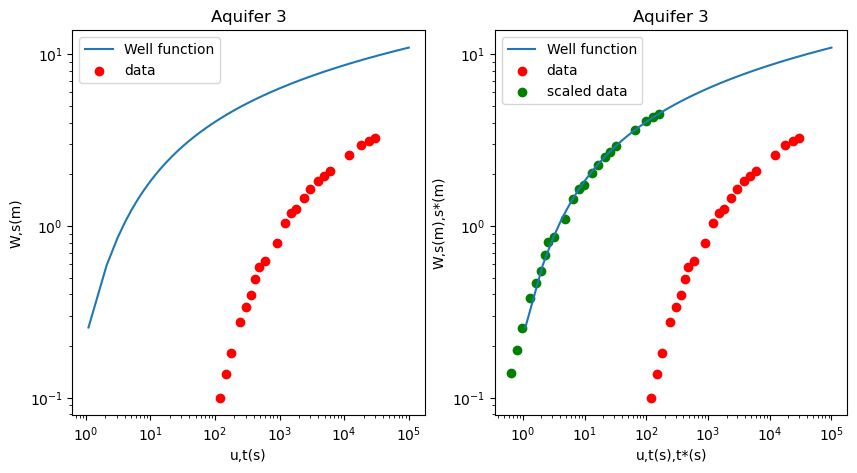

In [72]:
plt.figure()


fig, axs=plt.subplots(1,2, figsize=(10,5))
axs[0].plot(sim,abs(W), label='Well function')
axs[0].scatter(t3,s3, color='r' ,label='data')

axs[0].legend()
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel('u,t(s)')
axs[0].set_ylabel('W,s(m)')
axs[0].set_title('Aquifer 3') 

axs[1].plot(sim,abs(W), label='Well function')
axs[1].scatter(t3,s3, color='r' ,label='data')
axs[1].scatter(t3*A3,s3*B3, color='g' ,label='scaled data')
axs[1].legend()
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('u,t(s),t*(s)')
axs[1].set_ylabel('W,s(m),s*(m)')
axs[1].set_title('Aquifer 3') 
plt.savefig("/home/simone/Scrivania/Physics of the Hydrosphere/Figure/3_scaled.png",bbox_inches="tight")

In [73]:
T_3=Transmissivity(B3,Q_3)
S_3=Storage_coefficient(A3,T_3,r_3)

print(T_3,S_3)

0.0019115597250548416 0.00014133942179605667
